# paramhist
Plot histogram of image parameters for gamma ray showers and hadronic showers with the goal of reproducing Fig 7 in Fegan 1997 
https://iopscience.iop.org/article/10.1088/0954-3899/23/9/004/pdf

Author: Nik Korzoun

# Imports

In [1]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord

# for BDT
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

import seaborn as sns

# Read Data
1 corresponds to gamma-rays and 2 corresponds to cosmic-rays

e.g. df1 is the dataframe with gamma-ray data and df2 is the dataframe with cosmic-ray data

## Data files

In [2]:
# read data


df1 = pd.read_csv("data/lick2024/MRK421-sim-gamma/data/_merged.10xSig.reconstructed.csv")
df2 = pd.read_csv("data/lick2024/MRK421-sim-proton/data/_merged.10xSig.reconstructed.csv")

# df1 = pd.read_csv("../triangle_data/dev/tmp/MRK421-sim-gamma/data/_merged.csv")
# df2 = pd.read_csv("../triangle_data/dev/tmp/MRK421-sim-proton/data/_merged.csv")

# df1 = pd.read_csv("data/lick2024_layouts_test/10TeV/layout1/data/_merged.csv")
# df2 = pd.read_csv("data/lick2024_layouts_test/10TeV/layout1_PROTONS/data/_merged.csv")

# df1 = pd.read_csv("data/lick2024_layouts_test/10TeV/layout2/data/_merged.csv")
# df2 = pd.read_csv("data/lick2024_layouts_test/10TeV/layout2_PROTONS/data/_merged.csv")

###########

# df1 = pd.read_csv("0_5m_panoseti_10TeV.csv")
# df2 = pd.read_csv("0_5m_panoseti_10TeV_PROTONS.csv")

# df1 = pd.read_csv("1m_panoseti_10TeV.csv")
# df2 = pd.read_csv("1m_panoseti_10TeV_PROTONS.csv")

# df1 = pd.read_csv("2m_panoseti_10TeV.csv")
# df2 = pd.read_csv("2m_panoseti_10TeV_PROTONS.csv")

# df1 = pd.read_csv("4m_panoseti_10TeV.csv")
# df2 = pd.read_csv("4m_panoseti_10TeV_PROTONS.csv")

# df1 = pd.read_csv("8m_panoseti_10TeV.csv")
# df2 = pd.read_csv("8m_panoseti_10TeV_PROTONS.csv")

# df1 = pd.read_csv("data/gammaHadronCuts/tests/12m_panoseti_10TeV.csv")
# df2 = pd.read_csv("data/gammaHadronCuts/tests/12m_panoseti_10TeV_PROTONS.csv")

###########
# df1 = pd.read_csv("data/gammaHadronCuts/tests/12m_panoseti_1Tel_100GeV.csv")
# df2 = pd.read_csv("data/gammaHadronCuts/tests/12m_panoseti_1Tel_100GeV_PROTONS.csv")

# df1 = pd.read_csv("data/gammaHadronCuts/tests/12m_panoseti_1Tel_1TeV.csv")
# df2 = pd.read_csv("data/gammaHadronCuts/tests/12m_panoseti_1Tel_1TeV_PROTONS.csv")

# df1 = pd.read_csv("data/gammaHadronCuts/tests/12m_panoseti_1Tel_10TeV.csv")
# df2 = pd.read_csv("data/gammaHadronCuts/tests/12m_panoseti_1Tel_10TeV_PROTONS.csv")


## Cleaning data

In [3]:
# remove nans
array1=df1.dropna(subset=["Length", "Width","Miss","Distance","Azwidth","Alpha"])
array1=array1[array1["Width"]>0]
#array1.head()

array2=df2.dropna(subset=["Length", "Width","Miss","Distance","Azwidth","Alpha"])
array2=array2[array2["Width"]>0]
#array2.head()

In [4]:
array1.describe()

/home/nkorzoun/Software/miniconda3/envs/panoseti/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Event,Telescope,MeanX,StdX,MeanY,StdY,Phi,Size,Length,Width,...,Az,Ze,Xcore,Ycore,stdP,TrueAz,TrueZe,TrueXcore,TrueYcore,TrueEnergy
count,9512.000000,9512.000000,9512.000000,9512.000000,9512.000000,9512.000000,9512.000000,9512.000000,9512.000000,9.512000e+03,...,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03,9.512000e+03,9512.0,9512.000000,9512.000000,9512.000000
mean,49974.023759,2.002418,0.005917,0.272176,-0.005072,0.269408,179.975023,2696.504836,0.345970,1.801055e-01,...,176.301841,0.665538,-54.255961,-51.203717,inf,1.277000e+01,0.0,1.146906,0.339696,38017.321152
std,28873.666235,0.817673,0.913303,0.106807,0.896247,0.106902,137.972111,8477.685425,0.126545,3.671986e-02,...,104.918025,3.831480,2067.828683,2043.461055,NaN,1.776450e-15,0.0,120.537545,110.899159,66741.693661
min,31.000000,1.000000,-4.333470,0.090731,-3.741340,0.110469,0.000000,140.000000,0.152759,7.450580e-09,...,0.011594,0.002247,-99999.000000,-99999.000000,0.000000e+00,1.277000e+01,0.0,-500.641000,-490.257000,10000.700000
25%,24843.000000,1.000000,-0.695434,0.202578,-0.701980,0.201301,44.552525,911.750000,0.260677,1.542813e-01,...,81.691075,0.093749,-68.317150,-61.858900,1.024410e-10,1.277000e+01,0.0,-87.713550,-77.470450,12900.000000
50%,49660.000000,2.000000,-0.001858,0.246681,-0.011215,0.243936,89.853600,1430.000000,0.315754,1.807505e-01,...,173.304000,0.185447,-12.444600,-3.383830,2.598010e-09,1.277000e+01,0.0,-4.495280,0.681609,18609.800000
75%,75025.750000,3.000000,0.704650,0.314573,0.685866,0.310230,315.597750,2493.000000,0.394166,2.021470e-01,...,271.050500,0.372208,63.235800,72.174000,2.630930e+01,1.277000e+01,0.0,78.457400,77.013400,34933.350000
max,99999.000000,3.000000,4.323460,0.995592,3.977230,1.046600,360.000000,445408.000000,1.201690,7.407020e-01,...,359.927000,89.081800,12284.000000,5214.890000,inf,1.277000e+01,0.0,491.544000,386.184000,985814.000000


# Cuts

## Max Distance

In [5]:
# create max distance parameter
max1 = array1.groupby(['Event'])['Distance'].transform('max') == array1['Distance']
max_distance1= array1.loc[max1, ['Event', 'Distance']]
array1['MaxDistance']=max_distance1.Distance
max2 = array2.groupby(['Event'])['Distance'].transform('max') == array2['Distance']
max_distance2= array2.loc[max2, ['Event', 'Distance']]
array2['MaxDistance']=max_distance2.Distance

## Apply Cuts

In [6]:
# # cut by number of telescopes
# minTel=1
# array1 = array1.groupby('Event', group_keys=False).filter(lambda x: len(x) > (minTel-1))
# array2 = array2.groupby('Event', group_keys=False).filter(lambda x: len(x) > (minTel-1))

# Image Parameter Distributions

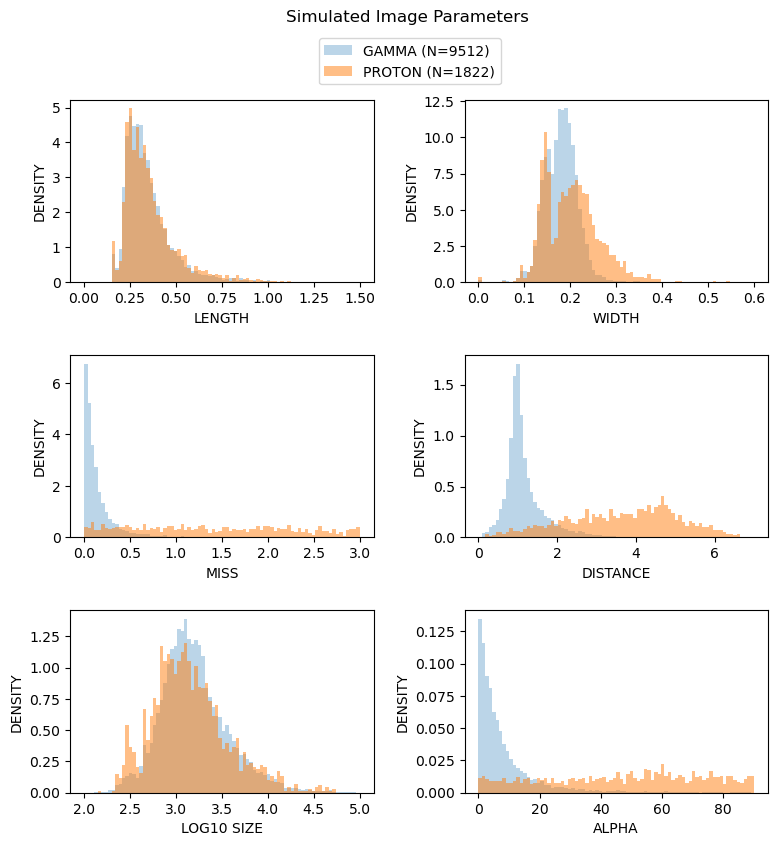

In [7]:
fig, axs = plt.subplots(3,2, figsize=(9,9))

fig.suptitle('Simulated Image Parameters')

# select subset of showers which are nearby
# array1 = array1[np.hypot(array1["TrueXcore"].values,array1["TrueYcore"].values) < 200]
# array2 = array2[np.hypot(array2["TrueXcore"].values,array2["TrueYcore"].values) < 200]

# cut showers by distance
# array1 = array1[array1["Distance"].values < 2]
# array2 = array2[array2["Distance"].values < 2]

# cut showers by alpha
# array1 = array1[array1["Alpha"].values > 10]
# array2 = array2[array2["Alpha"].values > 10]

# cut showers by size
# array1 = array1[array1["Size"].values > 10**3]
# array2 = array2[array2["Size"].values > 10**3]

axs[0,0].hist(array1.loc[:,"Length"], alpha=0.3, bins=80, range=(0,1.5), label='GAMMA (N={:.0f})'.format(len(array1)),density=True)
axs[0,0].hist(array2.loc[:,"Length"], alpha=0.5, bins=80, range=(0,1.5), label='PROTON (N={:.0f})'.format(len(array2)),density=True)
axs[0,0].set(xlabel='LENGTH')
axs[0,1].hist(array1.loc[:,"Width"], alpha=0.3, bins=80, range=(0,0.6),density=True)
axs[0,1].hist(array2.loc[:,"Width"], alpha=0.5, bins=80, range=(0,0.6),density=True)
axs[0,1].set(xlabel='WIDTH')
axs[1,0].hist(array1.loc[:,"Miss"], alpha=0.3, bins=80, range=(0,3),density=True)
axs[1,0].hist(array2.loc[:,"Miss"], alpha=0.5, bins=80, range=(0,3),density=True)
axs[1,0].set(xlabel='MISS')
axs[1,1].hist(array1.loc[:,"Distance"], alpha=0.3, bins=80, range=(0,7),density=True)
axs[1,1].hist(array2.loc[:,"Distance"], alpha=0.5, bins=80, range=(0,7),density=True)
axs[1,1].set(xlabel='DISTANCE')
# axs[2,0].hist(array1.loc[:,"Azwidth"], alpha=0.3, bins=80, range=(0,1),density=True)
# axs[2,0].hist(array2.loc[:,"Azwidth"], alpha=0.5, bins=80, range=(0,1),density=True)
# axs[2,0].set(xlabel='AZWIDTH')
# axs[2,0].hist(array1.loc[:,"Size"], alpha=0.3, bins=80, range=(0,1e3),density=True)
# axs[2,0].hist(array2.loc[:,"Size"], alpha=0.5, bins=80, range=(0,1e3),density=True)
axs[2,0].set(xlabel='Size')
axs[2,0].hist(np.log10(array1.loc[:,"Size"]), alpha=0.3, bins=80, range=(2,5),density=True)
axs[2,0].hist(np.log10(array2.loc[:,"Size"]), alpha=0.5, bins=80, range=(2,5),density=True)
axs[2,0].set(xlabel='LOG10 SIZE')
axs[2,1].hist(array1.loc[:,"Alpha"], alpha=0.3, bins=80, range=(0,90),density=True)
axs[2,1].hist(array2.loc[:,"Alpha"], alpha=0.5, bins=80, range=(0,90),density=True)
axs[2,1].set(xlabel='ALPHA')

for ax in axs.flat:
    # ax.set(ylabel='POPULATION (normalized)')
    ax.set(ylabel='DENSITY')

plt.subplots_adjust(hspace=0.4,wspace=0.3)
fig.legend(loc=(0.41,0.9))

# plt.savefig('/home/nkorzoun/Downloads/sim_params.png',dpi=300)

In [8]:
array1.head()

,Event,Telescope,MeanX,StdX,MeanY,StdY,Phi,Size,Length,Width,...,Ze,Xcore,Ycore,stdP,TrueAz,TrueZe,TrueXcore,TrueYcore,TrueEnergy,MaxDistance
78,99927,1,-0.526963,0.416659,0.141594,0.209487,347.3720,2292,0.424806,0.192431,...,NaN,NaN,NaN,NaN,12.77,0,-77.42860,-75.9733,13488.2,0.545655
90,99931,1,0.599748,0.166711,-0.707821,0.221914,88.5113,1042,0.221947,0.166667,...,0.141632,22.5016,-32.8089,330.669,12.77,0,6.32148,-31.8188,10604.9,NaN
91,99931,2,0.781081,0.231486,0.802404,0.217837,42.0478,769,0.283421,0.143914,...,0.141632,22.5016,-32.8089,330.669,12.77,0,6.32148,-31.8188,10604.9,NaN
92,99931,3,-1.078510,0.309345,0.528897,0.222439,332.5050,1150,0.335951,0.179751,...,0.141632,22.5016,-32.8089,330.669,12.77,0,6.32148,-31.8188,10604.9,1.201210
128,99943,3,1.496460,0.431797,0.081072,0.184731,359.3890,2614,0.431817,0.184684,...,NaN,NaN,NaN,NaN,12.77,0,250.87800,-45.0329,56839.4,1.498650


In [9]:
def get_telescope_X(n):
    if(n==3):
        return 126.65
    elif(n==1):
        return -101.35
    else:
        return -25.29

def get_telescope_Y(n):
    if(n==3):
        return -42.32
    elif(n==1):
        return -42.32
    else:
        return 84.64

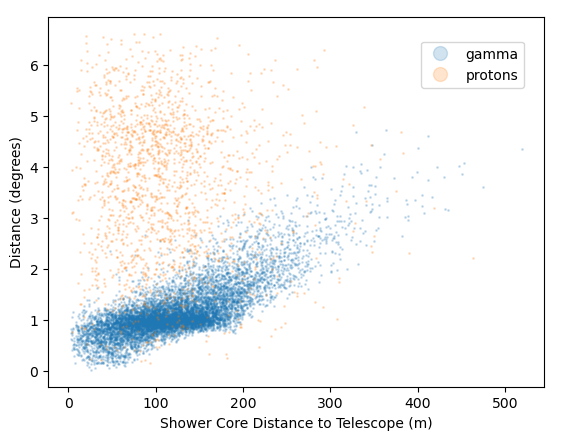

In [10]:
array1["TelX"] = array1["Telescope"].apply(get_telescope_X)
array1["TelY"] = array1["Telescope"].apply(get_telescope_Y)
array2["TelX"] = array2["Telescope"].apply(get_telescope_X)
array2["TelY"] = array2["Telescope"].apply(get_telescope_Y)

r1=np.hypot(array1["TrueXcore"]-array1["TelX"],array1["TrueYcore"]-array1["TelY"])
dist1=array1["Distance"]
r2=np.hypot(array2["TrueXcore"]-array2["TelX"],array2["TrueYcore"]-array2["TelY"])
dist2=array2["Distance"]

fig,axs = plt.subplots()
plt.xlabel('Shower Core Distance to Telescope (m)')
plt.ylabel('Distance (degrees)')
axs.plot(r1,dist1,linestyle='None',alpha=0.2,marker='o',markersize=1,label='gamma')
axs.plot(r2,dist2,linestyle='None',alpha=0.2,marker='o',markersize=1,label='protons')

fig.legend(loc=(0.75,0.8),markerscale=10)

In [11]:
# fig,axs = plt.subplots()
# plt.xlabel('Log10(Size)')
# plt.ylabel('Max Distance')
# axs.plot(np.log10(array1.Size),array1.MaxDistance,linestyle='None',alpha=0.2,marker='o',markersize=1,label='gamma')
# axs.plot(np.log10(array2.Size),array2.MaxDistance,linestyle='None',alpha=0.2,marker='o',markersize=1,label='protons')

# # plt.ylim(1,2.4)
# # plt.xlim(2.4,4.5)
# fig.legend(loc=(0.75,0.8),markerscale=10)

In [12]:
# sns.regplot(x=np.log10(array1.Size),y=array1.MaxDistance, x_bins=12,x_estimator=np.mean)

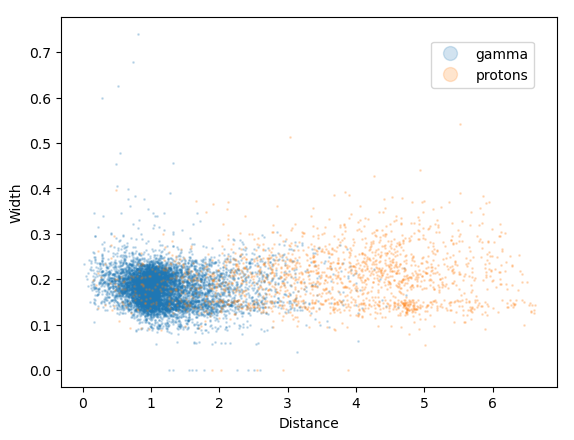

In [13]:
width1=array1["Width"]
dist1=array1["Distance"]
width2=array2["Width"]
dist2=array2["Distance"]

fig,axs = plt.subplots()
plt.xlabel('Distance')
plt.ylabel('Width')
axs.plot(dist1,width1,linestyle='None',alpha=0.2,marker='o',markersize=1,label='gamma')
axs.plot(dist2,width2,linestyle='None',alpha=0.2,marker='o',markersize=1,label='protons')

fig.legend(loc=(0.75,0.8),markerscale=10)

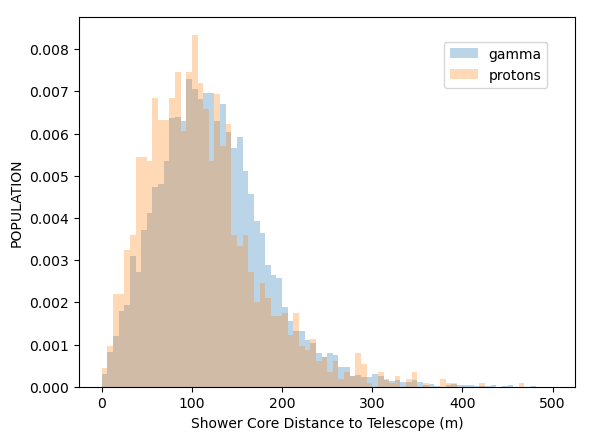

In [14]:
fig,axs = plt.subplots()
plt.xlabel('Shower Core Distance to Telescope (m)')
plt.ylabel('POPULATION')
axs.hist(r1,linestyle='None', alpha=0.3, bins=80, range=(0,500),density=True, label='gamma')
axs.hist(r2,linestyle='None', alpha=0.3, bins=80, range=(0,500),density=True,label='protons')

fig.legend(loc=(0.75,0.8),markerscale=10)

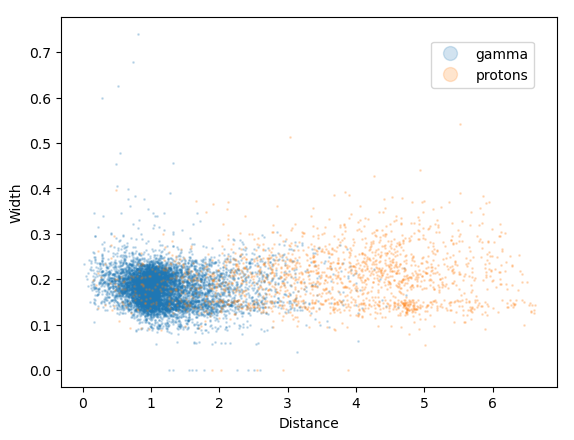

In [15]:
width1=array1["Width"]
dist1=array1["Distance"]
width2=array2["Width"]
dist2=array2["Distance"]

fig,axs = plt.subplots()
plt.xlabel('Distance')
plt.ylabel('Width')
axs.plot(dist1,width1,linestyle='None',alpha=0.2,marker='o',markersize=1,label='gamma')
axs.plot(dist2,width2,linestyle='None',alpha=0.2,marker='o',markersize=1,label='protons')

fig.legend(loc=(0.75,0.8),markerscale=10)

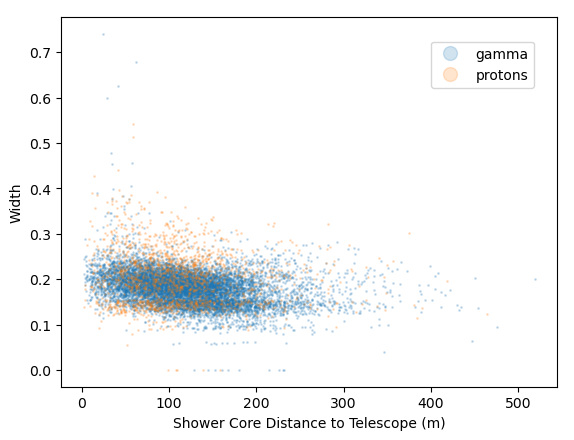

In [16]:
fig,axs = plt.subplots()
plt.xlabel('Shower Core Distance to Telescope (m)')
plt.ylabel('Width')
axs.plot(r1,width1,linestyle='None',alpha=0.2,marker='o',markersize=1,label='gamma')
axs.plot(r2,width2,linestyle='None',alpha=0.2,marker='o',markersize=1,label='protons')

fig.legend(loc=(0.75,0.8),markerscale=10)

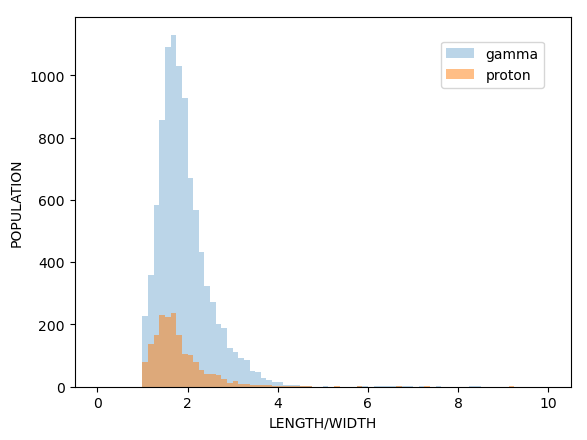

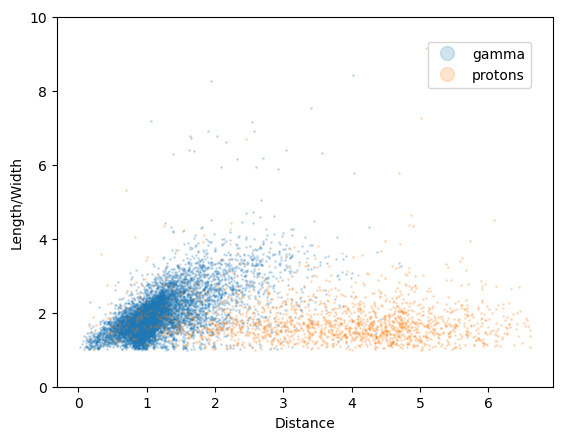

In [17]:
length1=array1["Length"]
length2=array2["Length"]

fig, axs = plt.subplots()
plt.xlabel('LENGTH/WIDTH')
plt.ylabel('POPULATION')
axs.hist(array1.loc[:,"Length"]/array1.loc[:,"Width"], alpha=0.3, bins=80, range=(0,10), label='gamma')
axs.hist(array2.loc[:,"Length"]/array2.loc[:,"Width"], alpha=0.5, bins=80, range=(0,10), label='proton')
fig.legend(loc=(0.75,0.8))

fig,axs = plt.subplots()
plt.xlabel('Distance')
plt.ylabel('Length/Width')
plt.ylim(0,10)
axs.plot(dist1,length1/width1,linestyle='None',alpha=0.2,marker='o',markersize=1,label='gamma')
axs.plot(dist2,length2/width2,linestyle='None',alpha=0.2,marker='o',markersize=1,label='protons')
fig.legend(loc=(0.75,0.8),markerscale=10)

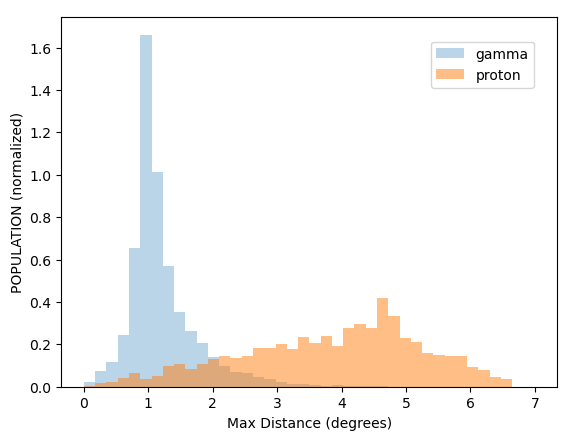

In [18]:
fig, axs = plt.subplots()
plt.xlabel('Max Distance (degrees)')
plt.ylabel('POPULATION (normalized)')

max1 = array1.groupby(['Event'])['Distance'].transform('max') == array1['Distance']
max_distance1= array1.loc[max1, ['Event', 'Distance']]
max2 = array2.groupby(['Event'])['Distance'].transform('max') == array2['Distance']
max_distance2= array2.loc[max2, ['Event', 'Distance']]

axs.hist(max_distance1.Distance, alpha=0.3, bins=40, range=(0,7), label='gamma',density=True)
axs.hist(max_distance2.Distance, alpha=0.5, bins=40, range=(0,7), label='proton',density=True)
fig.legend(loc=(0.75,0.8))

In [19]:
max_distance2.head(20)

,Event,Distance
14,99905,2.16489
152,99951,1.49260
255,99986,4.81034
613,905,4.08897
777,960,5.90230
1237,10113,3.29648
1415,10172,4.52955
1456,10186,4.65786
1521,10208,4.03816
1812,10305,5.68971


# Testing Mean-Scaled Parameters

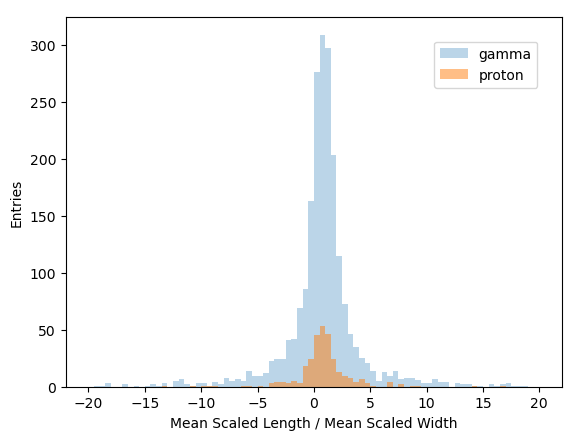

In [20]:
mean_w1=np.mean(array1["Width"])
std_w1=np.std(array1["Width"])
mean_w2=np.mean(array2["Width"])
std_w2=np.std(array2["Width"])

mean_l1=np.mean(array1["Length"])
std_l1=np.std(array1["Length"])
mean_l2=np.mean(array2["Length"])
std_l2=np.std(array2["Length"])

data1 = array1.groupby('Event', group_keys=False).filter(lambda x: len(x) > 1) # require more than 1 telescope
data2 = array2.groupby('Event', group_keys=False).filter(lambda x: len(x) > 1) # require more than 1 telescope

mscw1=pd.DataFrame(data=None, columns=["Event","MSCW"])
for i in data1["Event"].drop_duplicates():
    event = data1[data1["Event"]==i]
    mscw1.loc[len(mscw1)] = [i,np.sum( (event["Width"]-mean_w1)/std_w1 ) / len(event)]

mscw2=pd.DataFrame(data=None, columns=["Event","MSCW"])
for i in data2["Event"].drop_duplicates():
    event = data2[data2["Event"]==i]
    mscw2.loc[len(mscw2)] = [i,np.sum( (event["Width"]-mean_w2)/std_w2 ) / len(event)]

mscl1=pd.DataFrame(data=None, columns=["Event","MSCL"])
for i in data1["Event"].drop_duplicates():
    event = data1[data1["Event"]==i]
    mscl1.loc[len(mscl1)] = [i,np.sum( (event["Length"]-mean_l1)/std_l1 ) / len(event)]

mscl2=pd.DataFrame(data=None, columns=["Event","MSCL"])
for i in data2["Event"].drop_duplicates():
    event = data2[data2["Event"]==i]
    mscl2.loc[len(mscl2)] = [i,np.sum( (event["Length"]-mean_l2)/std_l2 ) / len(event)]

fig = plt.figure();
plt.xlabel('Mean Scaled Length / Mean Scaled Width')
plt.ylabel('Entries')
plt.hist(mscl1["MSCL"]/mscw1["MSCW"], bins=80, range=(-20,20), alpha=0.3, label='gamma');
plt.hist(mscl2["MSCL"]/mscw2["MSCW"], bins=80, range=(-20,20), alpha=0.5, label='proton');
fig.legend(loc=(0.75,0.8))


In [21]:
# do not calculate mean from bins outside the plotting range (some are erroneously large, >1e7)
gamma_lw=mscl1['MSCL']/mscw1['MSCW']
proton_lw=mscl2['MSCL']/mscw2['MSCW']

gamma_lw=gamma_lw[gamma_lw>-20]
gamma_lw=gamma_lw[gamma_lw<20]
proton_lw=proton_lw[proton_lw>-20]
proton_lw=proton_lw[proton_lw<20]

print("Gamma mean: {:.5f} degrees, N={}".format(gamma_lw.mean(),len(gamma_lw)))
print("Proton mean: {:.5f} degrees, N={}".format(proton_lw.mean(),len(proton_lw)))

Gamma mean: 0.75043 degrees, N=2109
Proton mean: 0.82568 degrees, N=295


# BDT
Based on https://arxiv.org/pdf/1701.06928.pdf
 - 200 trees
 - learning rate 1
 - max depth 50
 - Gini separation, best split

 I have not included
 - Cost complexity pruning 
    - at a glance, it performs worse, and I don't know what complexity is used in the paper

## set up classifier

In [22]:
tree = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=50, random_state=0)
classifier = AdaBoostClassifier(estimator=tree, n_estimators=200, learning_rate=1.0, random_state=0)

## create training set

In [23]:
data1 = array1[["Size","Length","Width","Distance"]]
data2 = array2[["Size","Length","Width","Distance"]]

data1 = data1.dropna()
data2 = data2.dropna()

# add length/width as a feature
data1["Length/Width"] = data1["Length"]/data1["Width"]
data2["Length/Width"] = data2["Length"]/data2["Width"]

# classify gamma as 1 and proton as 2
data1["Classification"] = 1
data2["Classification"] = 2

# combine data
X = pd.concat([data1,data2])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,:-1],X[["Classification"]], test_size=0.33, random_state=0)

In [25]:
X_train.head()

,Size,Length,Width,Distance,Length/Width
5100,2846,0.369360,0.201259,1.052800,1.835247
153727,783,0.309097,0.147405,1.738460,2.096923
251431,4206,0.832974,0.215417,2.213330,3.866798
57748,7071,0.661539,0.232926,1.880810,2.840125
262077,3173,0.374063,0.200525,0.835956,1.865418


In [26]:
y_train.head()

,Classification
5100,1
153727,1
251431,2
57748,1
262077,1


## train BDT

In [27]:
classifier.fit(X_train, y_train.values.ravel())
classifier.score(X_test, y_test.values.ravel())

/home/nkorzoun/Software/miniconda3/envs/panoseti/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.929965249933173

## results

### feature importance

In [28]:
features=np.array(list(zip(X_train.columns,classifier.feature_importances_)))
features=features[features[:, 1].argsort()][::-1]

print("Feature:\tFrequency:")
for f in features:
    print("{:<16}{:.2f} ".format(f[0],float(f[1])))

Feature:	Frequency:
Distance        0.71 
Length/Width    0.13 
Size            0.07 
Width           0.05 
Length          0.04 


### confusion matrix

<Figure size 6400x4800 with 0 Axes>

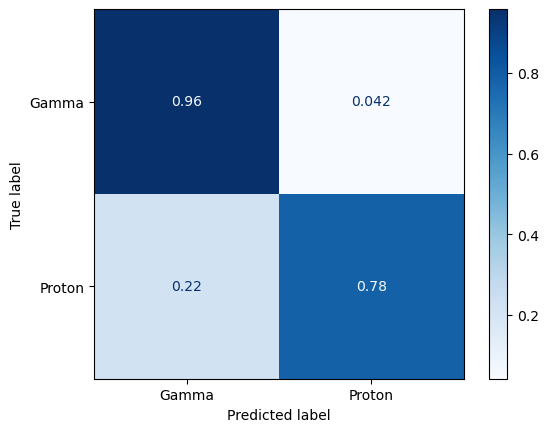

<Figure size 6400x4800 with 0 Axes>

In [29]:
disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    display_labels=["Gamma","Proton"],
    cmap=plt.cm.Blues,
    normalize="true"
)
# disp.ax_.set_title("Confusion Matrix")

plt.figure(dpi=1000)

### Identify false labelings

In [30]:
correct = X_test[y_test.values.ravel()==classifier.predict(X_test)]
correct["Classification"] = y_test[y_test["Classification"].values.ravel()==classifier.predict(X_test)]
incorrect = X_test[y_test.values.ravel()!=classifier.predict(X_test)]
incorrect["Classification"] = y_test[y_test["Classification"].values.ravel()!=classifier.predict(X_test)]

/tmp/ipykernel_1155280/1394113726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct["Classification"] = y_test[y_test["Classification"].values.ravel()==classifier.predict(X_test)]
/tmp/ipykernel_1155280/1394113726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect["Classification"] = y_test[y_test["Classification"].values.ravel()!=classifier.predict(X_test)]


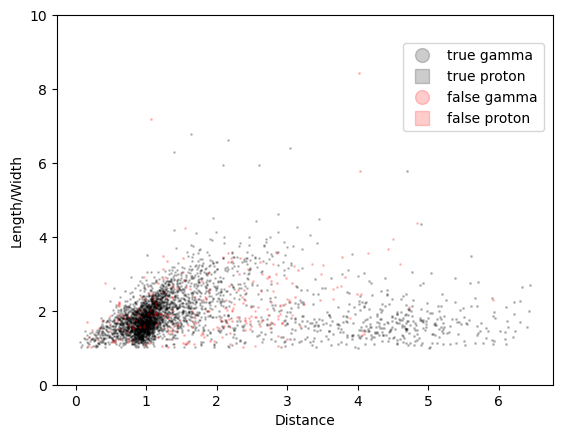

In [31]:
fig,axs = plt.subplots()
plt.xlabel('Distance')
plt.ylabel('Length/Width')
plt.ylim(0,10)
axs.plot(correct[correct["Classification"]==1]["Distance"],correct[correct["Classification"]==1]["Length/Width"],c="black",alpha=0.2,linestyle='None',marker='o',markersize=1,label='true gamma')
axs.plot(correct[correct["Classification"]==2]["Distance"],correct[correct["Classification"]==2]["Length/Width"],c="black",alpha=0.2,linestyle='None',marker='s',markersize=1,label='true proton')
axs.plot(incorrect[incorrect["Classification"]!=1]["Distance"],incorrect[incorrect["Classification"]!=1]["Length/Width"],c="red",alpha=0.2,linestyle='None',marker='o',markersize=1,label='false gamma')
axs.plot(incorrect[incorrect["Classification"]!=2]["Distance"],incorrect[incorrect["Classification"]!=2]["Length/Width"],c="red",alpha=0.2,linestyle='None',marker='s',markersize=1,label='false proton')
fig.legend(loc=(0.7,0.7),markerscale=10)

# Angular Resolution

In [32]:
def plotPSF(dataframe=df1, title="Photon Events", angle_range=(0,10), core_range=(0,200),threshold=10000):

    # energy threshold
    dataframe=dataframe[dataframe["TrueEnergy"]>threshold]

    data1 = dataframe.dropna(subset=["Az","Ze"]).drop_duplicates(subset="Event")
    c1 = SkyCoord(az=data1["Az"].values*u.deg, alt=(90-data1["Ze"].values)*u.deg, frame='altaz')
    c2 = SkyCoord(az=data1["TrueAz"].values*u.deg, alt=(90-data1["TrueZe"].values)*u.deg,frame='altaz')
    angle1=pd.DataFrame(c1.separation(c2).deg)
    core1 = pd.DataFrame(np.abs(np.hypot(data1["Xcore"].values,data1["Ycore"].values)-np.hypot(data1["TrueXcore"].values,data1["TrueYcore"].values)))

    data2 = dataframe.dropna(subset=["Az","Ze"]).dropna(subset="Alpha")
    data2 = data2.groupby('Event', group_keys=False).filter(lambda x: len(x) > 2).drop_duplicates(subset="Event") #require more than 2 telescopes
    c1 = SkyCoord(az=data2["Az"].values*u.deg, alt=(90-data2["Ze"].values)*u.deg, frame='altaz')
    c2 = SkyCoord(az=data2["TrueAz"].values*u.deg, alt=(90-data2["TrueZe"].values)*u.deg,frame='altaz')
    angle2=pd.DataFrame(c1.separation(c2).deg)
    core2 = pd.DataFrame(np.abs(np.hypot(data2["Xcore"].values,data2["Ycore"].values)-np.hypot(data2["TrueXcore"].values,data2["TrueYcore"].values)))

    fig, axs = plt.subplots(1,2, figsize=(10,4))
    fig.suptitle(title)

    axs[0].set_xlabel(r'Squared Angular Error [degrees$^2$]')
    axs[0].set_ylabel('Entries')
    axs[0].hist(angle1*angle1, alpha=0.3, bins = 40, range=angle_range,label = 'at least 2 telescopes' )
    axs[0].hist(angle2*angle2, alpha=0.5, bins = 40, range=angle_range,label = '3 telescopes' )

    axs[1].set_xlabel('Core Error [m]')
    axs[1].set_ylabel('Entries')
    axs[1].hist(core1, alpha=0.3, bins = 40, range=core_range,label = 'at least 2 telescopes')
    axs[1].hist(core2, alpha=0.5, bins = 40, range=core_range,label = '3 telescopes')

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels)

    return fig, angle1, core1, angle2, core2


## Photon Events

/tmp/ipykernel_1155280/21067074.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


====== At least 2 Telescopes ======
Angular Error 68% value: 0.32214 degrees, N=2183
Core Reconstruction 68% value: 29.78236 m, N=2183
====== 3 Telescopes ======
Angular Error 68% value: 0.18813 degrees, N=671
Core Reconstruction 68% value: 23.97873 m, N=671


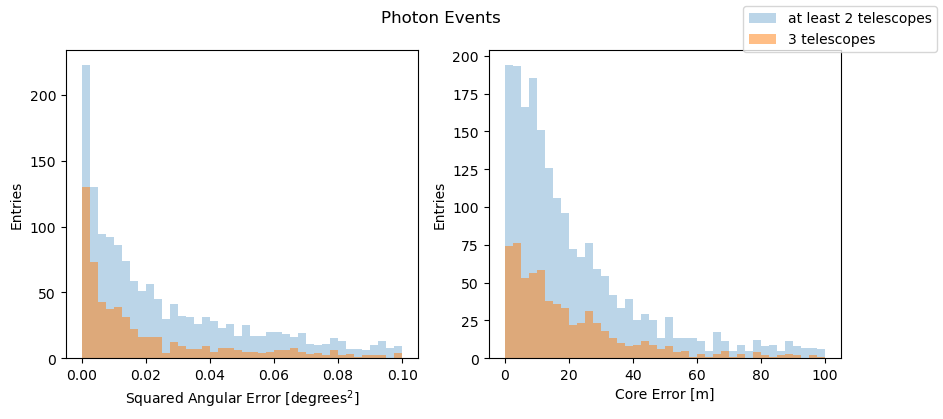

In [33]:
fig, angle1, core1, angle2, core2 = plotPSF(df1, "Photon Events", (0,0.1),(0,100))

fig.show()

print("====== At least 2 Telescopes ======")
print("Angular Error 68% value: {:.5f} degrees, N={}".format(angle1[0].quantile(0.68), angle1[0].count()))
print("Core Reconstruction 68% value: {:.5f} m, N={}".format(core1[0].quantile(0.68),core1[0].count()))

print("====== 3 Telescopes ======")
print("Angular Error 68% value: {:.5f} degrees, N={}".format(angle2[0].quantile(0.68), angle2[0].count()))
print("Core Reconstruction 68% value: {:.5f} m, N={}".format(core2[0].quantile(0.68),core2[0].count()))

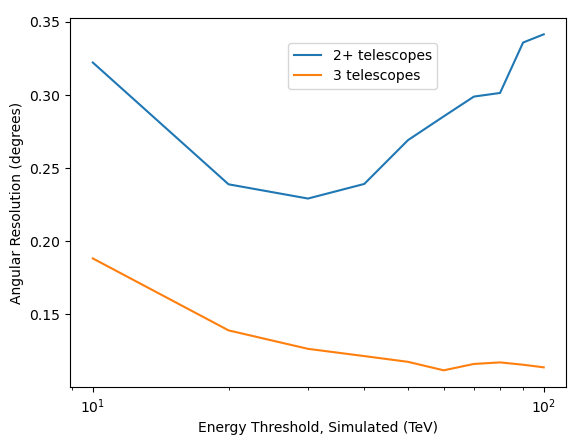

In [34]:
# angular resolution as a function of energy
thresholds = np.linspace(10,100,10)
resolution1 = []
resolution2 = []
for e in thresholds:
    fig, angle1, core1, angle2, core2 = plotPSF(df1, "Photon Events", (0,0.1),(0,100),e*1000)
    plt.close()
    resolution1.append(angle1[0].quantile(0.68))
    resolution2.append(angle2[0].quantile(0.68))
    #print(len(angle1))


fig,axs = plt.subplots()
plt.xlabel('Energy Threshold, Simulated (TeV)')
plt.ylabel('Angular Resolution (degrees)')

axs.plot(thresholds,resolution1, label='2+ telescopes')
axs.plot(thresholds,resolution2, label='3 telescopes')
axs.set_xscale('log')

fig.legend(loc=(0.5,0.8),markerscale=10)


### Proton Events

====== At least 2 Telescopes ======
Angular Error 68% value: 4.60596 degrees, N=309
Core Reconstruction 68% value: 50.32397 m, N=309
====== 3 Telescopes ======
Angular Error 68% value: 4.56040 degrees, N=76
Core Reconstruction 68% value: 24.65467 m, N=76


/tmp/ipykernel_1155280/1985813910.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


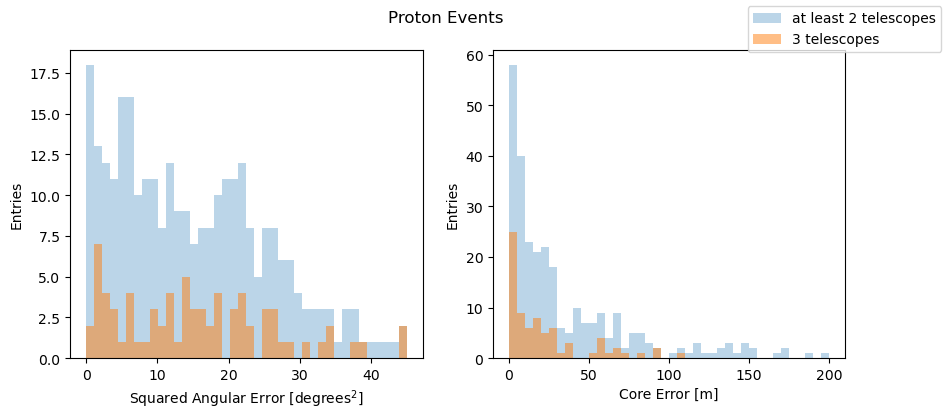

In [35]:
fig, angle1, core1, angle2, core2 = plotPSF(df2, "Proton Events", (0,45), (0,200))

fig.show()

print("====== At least 2 Telescopes ======")
print("Angular Error 68% value: {:.5f} degrees, N={}".format(angle1[0].quantile(0.68), angle1[0].count()))
print("Core Reconstruction 68% value: {:.5f} m, N={}".format(core1[0].quantile(0.68),core1[0].count()))

print("====== 3 Telescopes ======")
print("Angular Error 68% value: {:.5f} degrees, N={}".format(angle2[0].quantile(0.68), angle2[0].count()))
print("Core Reconstruction 68% value: {:.5f} m, N={}".format(core2[0].quantile(0.68),core2[0].count()))

# Effective Area

## photon events

In [36]:
triggeredEvents = df1.dropna(subset=["Az","Ze"]).dropna(subset="Alpha")
# require 2 telescopes
triggeredEvents = triggeredEvents.groupby('Event', group_keys=False).filter(lambda x: len(x) > 1).drop_duplicates(subset="Event")
#triggeredEvents = triggeredEvents[triggeredEvents["Alpha"]<0.23] # theta cut?
triggeredEvents.describe()

/home/nkorzoun/Software/miniconda3/envs/panoseti/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Event,Telescope,MeanX,StdX,MeanY,StdY,Phi,Size,Length,Width,...,Az,Ze,Xcore,Ycore,stdP,TrueAz,TrueZe,TrueXcore,TrueYcore,TrueEnergy
count,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,2183.000000,...,2183.000000,2183.000000,2183.000000,2183.000000,2.183000e+03,2.183000e+03,2183.0,2183.000000,2183.000000,2183.000000
mean,50414.061842,1.170866,0.314706,0.289621,-0.532215,0.270853,189.920332,3151.036189,0.361561,0.181993,...,176.309271,0.737095,-63.255181,-60.079324,inf,1.277000e+01,0.0,-8.934402,-1.173517,44943.439670
std,29062.617182,0.376478,0.963215,0.115067,0.696428,0.116273,141.408792,9489.825511,0.136520,0.038899,...,104.935257,4.107609,2219.906172,2193.740472,NaN,1.776764e-15,0.0,93.675561,86.846585,76902.068143
min,31.000000,1.000000,-2.931540,0.096663,-3.541290,0.117921,0.010616,186.000000,0.153369,0.000000,...,0.011594,0.002247,-99999.000000,-99999.000000,0.000000e+00,1.277000e+01,0.0,-319.335000,-435.263000,10013.400000
25%,24545.500000,1.000000,-0.397552,0.212562,-0.924702,0.198315,42.457150,960.000000,0.267620,0.154331,...,81.993550,0.100811,-76.174950,-65.003250,7.976145e-11,1.277000e+01,0.0,-71.133650,-55.755200,13898.150000
50%,50348.000000,1.000000,0.502542,0.264689,-0.568559,0.239718,276.164000,1525.000000,0.328861,0.182055,...,173.304000,0.197574,-13.582600,-6.268690,6.076570e-10,1.277000e+01,0.0,0.548896,1.515460,21588.500000
75%,75705.500000,1.000000,0.963660,0.335515,-0.125154,0.312609,324.191000,3043.000000,0.413570,0.204756,...,270.231000,0.401532,69.045450,74.803700,2.303545e+00,1.277000e+01,0.0,56.488900,54.434400,42556.600000
max,99999.000000,2.000000,4.323460,0.995592,3.738650,0.987844,359.924000,258625.000000,1.201690,0.678154,...,359.927000,89.081800,12284.000000,5214.890000,inf,1.277000e+01,0.0,390.337000,386.184000,985814.000000


### 2+ telescope triggered events

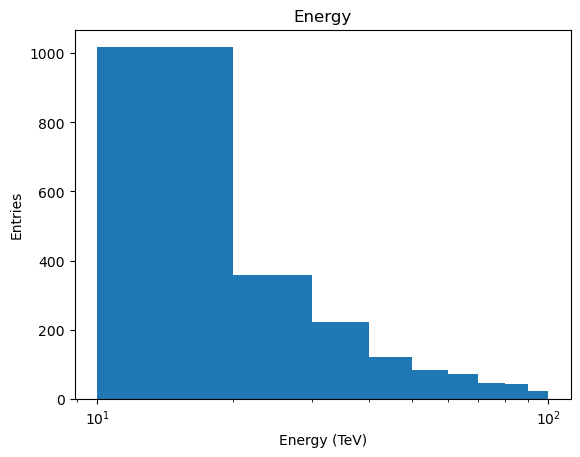

In [37]:
fig = plt.figure();
plt.title('Energy')
plt.xlabel('Energy (TeV)')
plt.ylabel('Entries')
plt.hist(triggeredEvents["TrueEnergy"]/1000, bins=9, range=(10,100));
plt.xscale('log');



### all simulated events

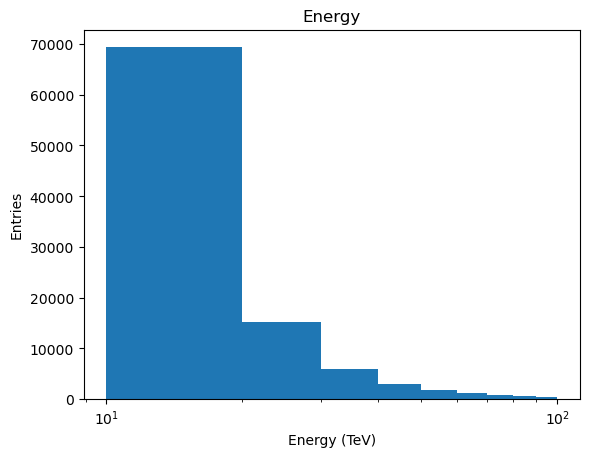

In [38]:
fig = plt.figure();
plt.title('Energy')
plt.xlabel('Energy (TeV)')
plt.ylabel('Entries')
#plt.hist(df1[df1["Alpha"]<0.23].drop_duplicates(subset="Event")["TrueEnergy"]/1000, bins=9, range=(10,100)); # theta cut?
plt.hist(df1.drop_duplicates(subset="Event")["TrueEnergy"]/1000, bins=9, range=(10,100));
plt.xscale('log');

In [39]:
# LHAASO data
# from https://www.science.org/doi/10.1126/sciadv.adj2778
# points digitized from https://apps.automeris.io/wpd/
km2a=[[10, 3.2e+5],
# [11, 3.7e+5],
# [11, 4.2e+5],
[12, 4.6e+5],
# [13, 5.1e+5],
# [14, 5.7e+5],
# [14, 6.1e+5],
[15, 6.4e+5],
# [16, 6.7e+5],
# [17, 7.1e+5],
[18, 7.3e+5],
# [19, 7.5e+5],
[21, 7.6e+5],
# [22, 7.9e+5],
# [23, 7.9e+5],
[25, 8.0e+5],
[42, 8.3e+5],
# [45, 8.5e+5],
# [48, 8.3e+5],
[51, 8.3e+5],
[54, 8.3e+5],
# [57, 8.4e+5],
[60, 8.3e+5],
# [63, 8.3e+5],
[82, 8.3e+5],
[87, 8.4e+5],
[91, 8.4e+5],
[1.0e+2, 8.4e+5]]

kx, ky = zip(*km2a)
ky=[n/1e+6 for n in ky]

Text(0.5, 1.0, 'Effective Area')

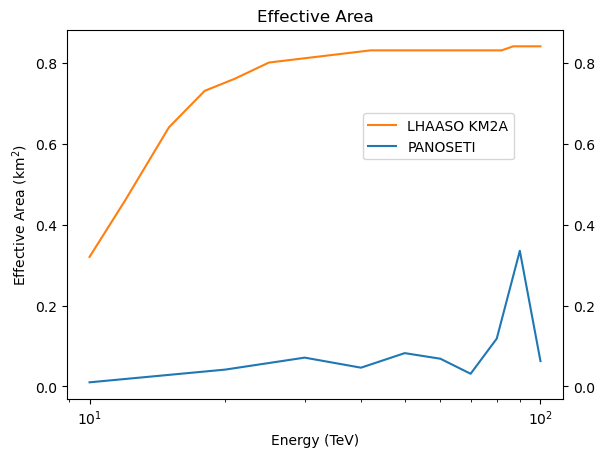

In [40]:
# calculate effective area
triggered, binEdges = np.histogram(triggeredEvents["TrueEnergy"]/1000,bins=10)
all, _ = np.histogram(df1.drop_duplicates(subset="Event")["TrueEnergy"]/1000,bins=10)

effA = np.pi*0.4*0.4*triggered/all
effAerr = np.sqrt(triggered)*np.pi*0.4*0.4/all

fig,axs = plt.subplots()
plt.xlabel('Energy (TeV)')
plt.ylabel(r'Effective Area (km$^2$)')

#axs.plot([10,100],[1.3,1.3],label='LHAASO KM2A', color='tab:orange')
axs.plot(kx,ky,label='LHAASO KM2A', color='tab:orange')

bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
#axs.errorbar(bincenters,effA,yerr=effAerr,linestyle='None',color='tab:blue')
axs.plot([10,20,30,40,50,60,70,80,90,100],effA,color='tab:blue',label='PANOSETI')
axs.set_xscale('log')
#axs.set_yscale('log')
plt.tick_params(labelright=True,right=True,which='both')
#plt.yticks([0.01,0.1,1])
fig.legend(loc=(0.6,0.65),markerscale=10)
plt.title("Effective Area")
